In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows=100

In [3]:
path=r'C:\Users\berid\python\boston\\'
df=pd.DataFrame()

for file in os.listdir(path)[:-1]:
    data=pd.read_csv(path+file)
    df=pd.concat([df,data],ignore_index=True)
    
codes=pd.read_csv(r"C:\Users\berid\python\boston\offense_codes2.csv",encoding='latin1')

In [4]:
df.columns=df.columns.str.title().str.strip()

In [5]:
df=df.drop(columns='Location',errors='ignore')

In [6]:
df

,Incident_Number,Offense_Code,Offense_Code_Group,Offense_Description,District,Reporting_Area,Shooting,Occurred_On_Date,Year,Month,Day_Of_Week,Hour,Ucr_Part,Street,Lat,Long
0,I172040657,2629,Harassment,HARASSMENT,C11,397,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Two,MELBOURNE ST,42.291093,-71.065945
1,I182061268,3201,Property Lost,PROPERTY - LOST,NaN,,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,BERNARD,NaN,NaN
2,I162013546,3201,Property Lost,PROPERTY - LOST,B3,433,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,NORFOLK ST,42.283634,-71.082813
3,I152051083,3115,Investigate Person,INVESTIGATE PERSON,A7,20,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,PARIS ST,42.377023,-71.032247
4,I152059178,2647,Other,THREATS TO DO BODILY HARM,C11,359,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Two,WASHINGTON ST,42.293606,-71.071887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656899,232000091,1402,NaN,VANDALISM,A1,66,0,31-12-22 23:30,2022,12,Saturday,23,NaN,CHARLES ST,42.359790,-71.070782
656900,232000002,3831,NaN,M/V - LEAVING SCENE - PROPERTY DAMAGE,C11,,0,31-12-22 23:37,2022,12,Saturday,23,NaN,COLUMBIA RD,42.319593,-71.062607
656901,232000140,619,NaN,LARCENY ALL OTHERS,D14,778,0,31-12-22 23:45,2022,12,Saturday,23,NaN,WASHINGTON ST,42.349056,-71.150498
656902,232000315,3201,NaN,PROPERTY - LOST/ MISSING,D4,167,0,31-12-22 23:50,2022,12,Saturday,23,NaN,HARRISON AVENUE,NaN,NaN


In [7]:
df.isna().sum()

Incident_Number             0
Offense_Code                0
Offense_Code_Group     303651
Offense_Description         0
District                 4310
Reporting_Area              0
Shooting               351798
Occurred_On_Date            0
Year                        0
Month                       0
Day_Of_Week                 0
Hour                        0
Ucr_Part               303748
Street                  11888
Lat                     35298
Long                    35298
dtype: int64

In [8]:
from plotly.subplots import make_subplots
from plotly import graph_objects as go

C:\Users\berid\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




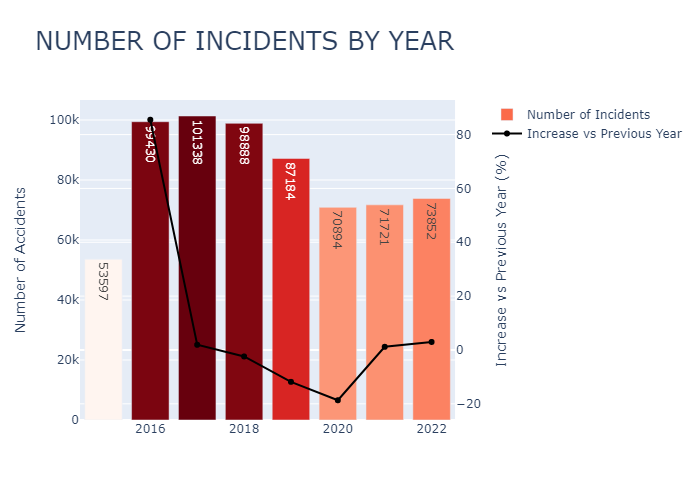

In [9]:
grouped=df.groupby('Year')['Incident_Number'].count().reset_index()
grouped['Increase']=(grouped['Incident_Number']-grouped['Incident_Number'].shift(1))/grouped['Incident_Number'].shift(1)*100
grouped['Increase']=grouped['Increase'].round(2)


fig=make_subplots(specs=[[{'secondary_y':True}]])
trace1=go.Bar(x=grouped['Year'],y=grouped['Incident_Number'],name='Number of Incidents',text=grouped['Incident_Number'])
trace2=go.Line(x=grouped['Year'],y=grouped['Increase'],name='Increase vs Previous Year')

fig.add_trace(trace1,secondary_y=False)
fig.add_trace(trace2,secondary_y=True)

fig.update_traces(marker=dict(color=grouped['Incident_Number'],colorscale='Reds'),secondary_y=False)
fig.update_traces(marker=dict(color='black'),secondary_y=True)
fig.update_layout(title_text='NUMBER OF INCIDENTS BY YEAR',title_font=dict(size=25))
fig.update_yaxes(title_text='Increase vs Previous Year (%)',secondary_y=True)
fig.update_yaxes(title_text='Number of Accidents',secondary_y=False)

fig.show('png')

In [10]:
grouped=df.groupby('Day_Of_Week')['Incident_Number'].count().reset_index().sort_values('Incident_Number',ascending=False)

fig=px.bar(data_frame=grouped, x='Day_Of_Week',y='Incident_Number',color='Incident_Number',text='Incident_Number')
fig.update_layout(title_text='NUMBER OF INCIDENTS BY WEEKDAY',title_font=dict(size=25))

fig.write_html(r'C:\Users\berid\OneDrive\Desktop\fig11.html')

In [11]:
df['Occurred_On_Date']=pd.to_datetime(df['Occurred_On_Date'])

In [12]:
df['Incident_Date']=df['Occurred_On_Date'].dt.date
df['Incident_Month']=df['Occurred_On_Date'].dt.to_period('M')
df['Incident_Week']=df['Occurred_On_Date'].dt.to_period('W')

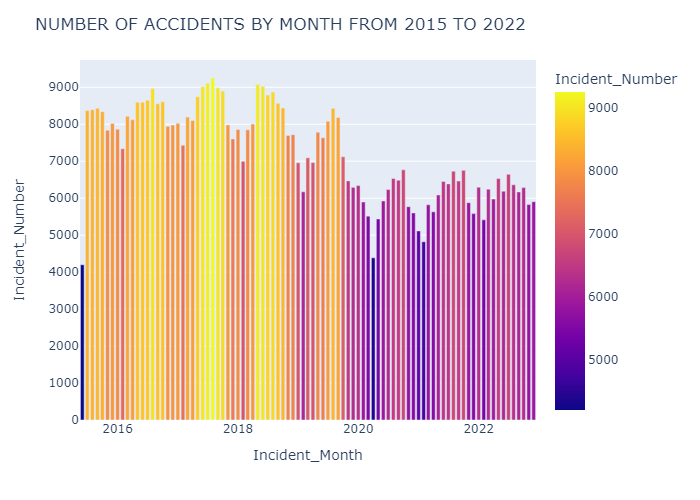

In [13]:
grouped=df.groupby('Incident_Month')['Incident_Number'].count().reset_index()
grouped['Incident_Month']=grouped['Incident_Month'].astype(str)

fig=px.bar(grouped,x='Incident_Month',y='Incident_Number',color='Incident_Number')
fig.update_layout(title='NUMBER OF ACCIDENTS BY MONTH FROM 2015 TO 2022')
fig.show('png')

In [14]:
df.columns

Index(['Incident_Number', 'Offense_Code', 'Offense_Code_Group',
       'Offense_Description', 'District', 'Reporting_Area', 'Shooting',
       'Occurred_On_Date', 'Year', 'Month', 'Day_Of_Week', 'Hour', 'Ucr_Part',
       'Street', 'Lat', 'Long', 'Incident_Date', 'Incident_Month',
       'Incident_Week'],
      dtype='object')

In [15]:
top_accidents=df.groupby('Offense_Code_Group')['Incident_Number'].count().sort_values(ascending=False).index[:3]
filtered=df[df['Offense_Code_Group'].isin(top_accidents)]

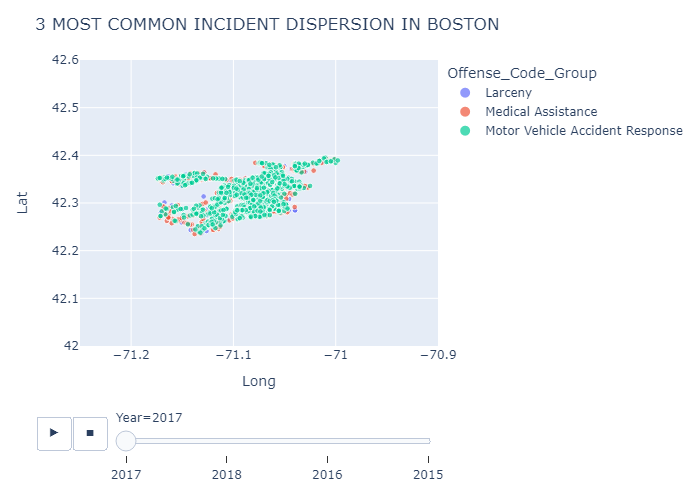

In [16]:
fig=px.scatter(data_frame=filtered.sample(10**4),x='Long',y='Lat',
               animation_frame='Year',
               color='Offense_Code_Group',color_continuous_midpoint='Reds',
               size=[1 for i in range(10**4)],size_max=4)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.update_xaxes(range=[-71.25,-70.9])
fig.update_yaxes(range=[42,42.6])
fig.update_layout(title='3 MOST COMMON INCIDENT DISPERSION IN BOSTON')
fig.show('png')

In [17]:
grouped=df.groupby(['Offense_Code_Group','Street'])['Incident_Number'].count().reset_index()\
.sort_values(['Offense_Code_Group','Incident_Number'],ascending=[True,False])\
.groupby('Offense_Code_Group').head(1)

OFFENSE GROUPS AND STREETS

                              Offense_Code_Group               Street
1394                          Aggravated Assault        WASHINGTON ST
1489                                    Aircraft          PRESCOTT ST
1567                                       Arson        WASHINGTON ST
1714            Assembly or Gathering Violations          HILLSIDE ST
3249                                  Auto Theft        WASHINGTON ST
3576                         Auto Theft Recovery          FRONTAGE RD
4440                                  Ballistics        WASHINGTON ST
4477                           Biological Threat         CAMBRIDGE ST
4541                                   Bomb Hoax        WASHINGTON ST
4545                Burglary - No Property Taken  AMERICAN LEGION HWY
4837                         Commercial Burglary        WASHINGTON ST
5926                            Confidence Games        WASHINGTON ST
6452                              Counterfeiting        WASHIN

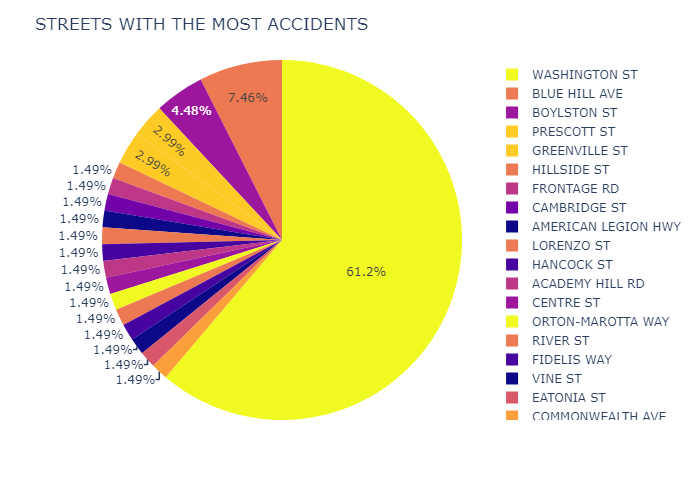

In [18]:
fig=px.pie(data_frame=grouped,names='Street',color='Offense_Code_Group',color_discrete_sequence=px.colors.sequential.Plasma_r)
print('OFFENSE GROUPS AND STREETS',grouped[['Offense_Code_Group','Street']].head(100),sep='\n\n')
fig.update_layout(title='STREETS WITH THE MOST ACCIDENTS')
fig.show('png')

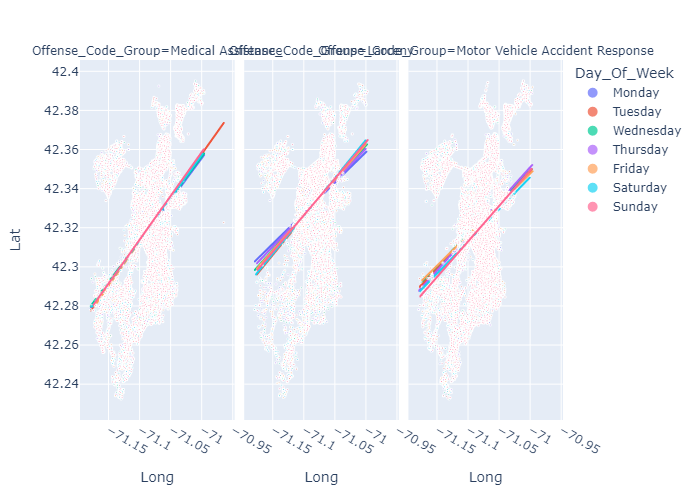

In [19]:
filtered=df[df['Offense_Code_Group'].isin(top_accidents)]

fig=px.scatter(data_frame=filtered,x='Long',y='Lat',
               trendline='ols',
               size=[1 for i in range(len(filtered))],size_max=2,
               color='Day_Of_Week',
              facet_col='Offense_Code_Group')
fig.update_layout(font_size=12)
fig.show('png')

In [20]:
r"""
for file in os.listdir(path):
    if file=='plotly.html':
        os.remove(r"C:\Users\berid\OneDrive\Desktop\plotly.html")
    else:
        None

import os
from bs4 import BeautifulSoup

path=r"C:\Users\berid\OneDrive\Desktop\\"
bs = BeautifulSoup()
bs.append(bs.new_tag("html"))
bs.html.append(bs.new_tag("body"))

for file in os.listdir(path):
    if not file.lower().endswith('.html'):
        continue

    with open(path+file,'r',encoding='utf8') as html_file:
        bs.body.extend(BeautifulSoup(html_file.read(), "html.parser").body)

with open(r"C:\Users\berid\OneDrive\Desktop\plotly.html", 'wb') as f:
    f.write(bytes(bs.prettify(), encoding='utf8'))
    
for file in os.listdir(path):
    if file.endswith('.html') and file!='plotly.html':
        os.remove(path+file)
"""

'\nfor file in os.listdir(path):\n    if file==\'plotly.html\':\n        os.remove(r"C:\\Users\\berid\\OneDrive\\Desktop\\plotly.html")\n    else:\n        None\n\nimport os\nfrom bs4 import BeautifulSoup\n\npath=r"C:\\Users\\berid\\OneDrive\\Desktop\\\\"\nbs = BeautifulSoup()\nbs.append(bs.new_tag("html"))\nbs.html.append(bs.new_tag("body"))\n\nfor file in os.listdir(path):\n    if not file.lower().endswith(\'.html\'):\n        continue\n\n    with open(path+file,\'r\',encoding=\'utf8\') as html_file:\n        bs.body.extend(BeautifulSoup(html_file.read(), "html.parser").body)\n\nwith open(r"C:\\Users\\berid\\OneDrive\\Desktop\\plotly.html", \'wb\') as f:\n    f.write(bytes(bs.prettify(), encoding=\'utf8\'))\n    \nfor file in os.listdir(path):\n    if file.endswith(\'.html\') and file!=\'plotly.html\':\n        os.remove(path+file)\n'